In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Read in ELOs
data = pd.read_csv('all_elos.csv')

def get_post_elo(home_team, home_team_elo, away_team, away_team_elo, mov, decay):
    
    home_post_elo = get_k(mov, home_team_elo, away_team_elo, decay)*(int(mov>0) - get_win_prob(home_team_elo, away_team_elo)) + home_team_elo
    away_post_elo = away_team_elo + (home_team_elo - home_post_elo)
    
    return home_post_elo, away_post_elo
    
def get_win_prob(home_team_elo, away_team_elo):
    home_team_elo += 100
    return 1.0/(1.0+(10.0**((away_team_elo-home_team_elo)/400)))

def get_k(mov, team_elo, opp_elo, decay):
    
    if mov > 0: elo_dif = team_elo-opp_elo
    else: elo_dif = opp_elo-team_elo
    
    K = 20.0*((np.abs(mov)+3.0)**.8)
    K = K/(7.5 + .006*elo_dif)
    return K*decay

In [7]:
# Get Prediction Accuracies by Year
years = data.season.unique()
years

elo_accs = []
elo_538_accs = []
carm_elo_538_accs = []

# For Each Season
for year in years:
    
    # Trim to the Given Season
    trim = data[data['season']==year]
    
    # Get Predictions
    elo_preds = [get_win_prob(team_elo, opp_elo) > .5 for team_elo, opp_elo in zip(trim['elo1_pre'], trim['elo2_pre'])]
    elo_538_preds = [get_win_prob(team_elo, opp_elo) > .5 for team_elo, opp_elo in zip(trim['elo1_pre_538'], trim['elo2_pre_538'])]
    carm_elo_538_preds = [get_win_prob(team_elo, opp_elo) > .5 for team_elo, opp_elo in zip(trim['carm_elo1_pre_538'], trim['carm_elo2_pre_538'])]
    
    # Get Outcomes
    outcomes = [mov > 0 for mov in trim['MOV']]
    
    # Get Success Rates
    elo_accs.append(np.mean([elo_preds[j] == outcomes[j] for j in range(len(elo_preds))]))
    elo_538_accs.append(np.mean([elo_538_preds[j] == outcomes[j] for j in range(len(elo_538_preds))]))
    carm_elo_538_accs.append(np.mean([carm_elo_538_preds[j] == outcomes[j] for j in range(len(carm_elo_538_preds))]))

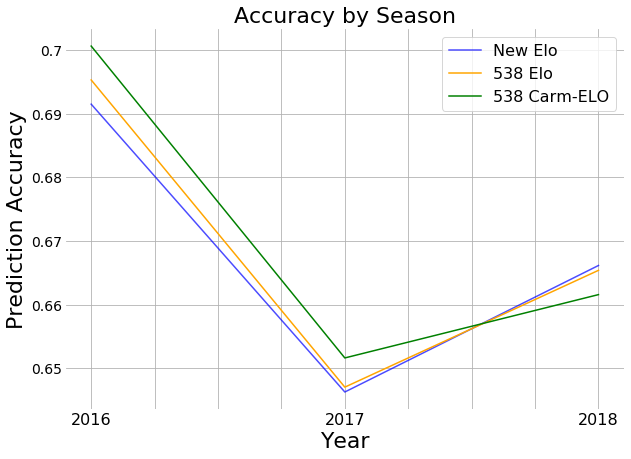

In [8]:
fig, ax = plt.subplots(1,1,figsize=(10,7))

# Plot Accuracies by Year
ax.plot(elo_accs[-3:], label = 'New Elo', color='blue', alpha=.7)
ax.plot(elo_538_accs[-3:], label = '538 Elo', color='orange')
ax.plot(carm_elo_538_accs[-3:], label = '538 Carm-ELO', color='green')

ax.set_xticklabels(["", 2016, "", '', '', 2017, "", '', '', 2018], fontsize=16)
ax.set_yticklabels([0.0,.65, .66, .67, .68, .69, .70], fontsize=14)

ax.set_xlabel('Year', fontsize=22)
ax.set_ylabel('Prediction Accuracy', fontsize=22)
ax.set_title('Accuracy by Season', fontsize=22)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)

ax.legend(fontsize=16)
ax.grid()

plt.savefig('Carm_ELO_accuracy.png')
plt.show()

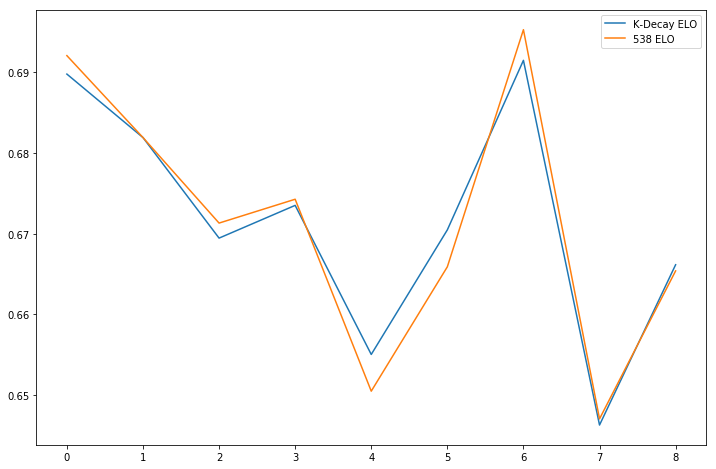

In [9]:
fig, ax = plt.subplots(1,1,figsize=(12,8))

# Plot Accuracies by Year
ax.plot(elo_accs, label = 'K-Decay ELO')
ax.plot(elo_538_accs, label = '538 ELO')

plt.legend()
plt.show()

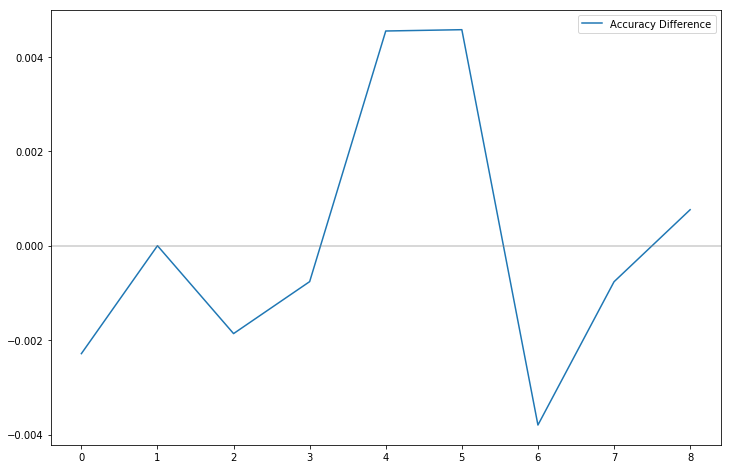

In [10]:
difs = [elo_accs[i] - elo_538_accs[i] for i in range(len(elo_accs))]

fig, ax = plt.subplots(1,1,figsize=(12,8))

# Plot Accuracies by Year
ax.plot(difs, label = 'Accuracy Difference')
ax.axhline(0, alpha = .4, color='grey')

plt.legend()
plt.show()

## This Year's Results

In [11]:
data_2019 = pd.read_csv('2019_elos.csv')

In [12]:
# Get Predictions
elo_preds = [get_win_prob(team_elo, opp_elo) > .5 for team_elo, opp_elo in zip(data_2019['elo1_pre'], data_2019['elo2_pre'])]
elo_538_preds = [get_win_prob(team_elo, opp_elo) > .5 for team_elo, opp_elo in zip(data_2019['elo1_pre_538'], data_2019['elo2_pre_538'])]
carm_elo_538_preds = [get_win_prob(team_elo, opp_elo) > .5 for team_elo, opp_elo in zip(data_2019['carm_elo1_pre_538'], data_2019['carm_elo2_pre_538'])]
carmelo_538_preds = [get_win_prob(team_elo, opp_elo) > .5 for team_elo, opp_elo in zip(data_2019['carmelo1_pre_538'], data_2019['carmelo2_pre_538'])]

# Get Outcomes
outcomes = [mov > 0 for mov in data_2019['MOV']]

# Get Success Rates
elo_acc = np.mean([elo_preds[j] == outcomes[j] for j in range(len(elo_preds))])
elo_538_acc = np.mean([elo_538_preds[j] == outcomes[j] for j in range(len(elo_538_preds))])
carm_elo_538_acc = np.mean([carm_elo_538_preds[j] == outcomes[j] for j in range(len(carm_elo_538_preds))])
carmelo_538_acc = np.mean([carmelo_538_preds[j] == outcomes[j] for j in range(len(carmelo_538_preds))])

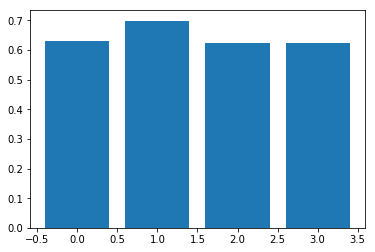

In [13]:
accuracies = [elo_acc, elo_538_acc, 1-carm_elo_538_acc, 1-carmelo_538_acc]
plt.bar(range(len(accuracies)), accuracies)
plt.show()

## Which Games in 2017 and 2018 Does K-Decay Predict Differently Than 538's ELO

In [14]:
data_2018 = data[data['season']>=2017]
data_2018 = data_2018[data_2018['season']<=2018]

# Get Predictions
elo_preds = [get_win_prob(team_elo, opp_elo) > .5 for team_elo, opp_elo in zip(data_2018['elo1_pre'], data_2018['elo2_pre'])]
elo_538_preds = [get_win_prob(team_elo, opp_elo) > .5 for team_elo, opp_elo in zip(data_2018['elo1_pre_538'], data_2018['elo2_pre_538'])]
carm_elo_538_preds = [get_win_prob(team_elo, opp_elo) > .5 for team_elo, opp_elo in zip(data_2018['carm_elo1_pre_538'], data_2018['carm_elo2_pre_538'])]
carmelo_538_preds = [get_win_prob(team_elo, opp_elo) > .5 for team_elo, opp_elo in zip(data_2018['carmelo1_pre_538'], data_2018['carmelo2_pre_538'])]

# Get Outcomes
outcomes = [mov > 0 for mov in data_2018['MOV']]

# 1 of Different Prediction, 0 Otherwise
dif_preds = [elo_preds[i] != elo_538_preds[i] for i in range(len(elo_preds))]
data_2018['elo_pred_dif'] = dif_preds

dif_df = data_2018[data_2018['elo_pred_dif']==1].drop(columns=['Unnamed: 0'])
dif_df

,MOV,carm_elo1_pre_538,carm_elo2_pre_538,carmelo1_pre_538,carmelo2_pre_538,date,elo1_post,elo1_pre,elo1_pre_538,elo2_post,elo2_pre,elo2_pre_538,score1,score2,season,team1,team2,elo_pred_dif
8974,-3.0,1608.671707,1661.841080,NaN,NaN,2016-10-28,1573.633824,1580.061912,1576.156750,1676.934823,1670.506735,1698.804089,91.0,94.0,2017,TOR,CLE,True
9022,18.0,1403.868716,1442.457065,NaN,NaN,2016-11-03,1444.185524,1426.504968,1415.039120,1491.710015,1509.390571,1515.542905,125.0,107.0,2017,MIL,IND,True
9153,14.0,1471.427026,1582.577308,NaN,NaN,2016-11-20,1460.660240,1445.582869,1443.401833,1529.392934,1544.470305,1546.755884,105.0,91.0,2017,DEN,UTA,True
9242,6.0,1566.222595,1629.507112,NaN,NaN,2016-12-02,1551.586028,1543.014524,1534.748876,1632.089404,1640.660908,1658.745095,111.0,105.0,2017,CHI,CLE,True
9298,8.0,1387.170902,1469.188977,NaN,NaN,2016-12-09,1412.360193,1402.266658,1400.918383,1490.594316,1500.687851,1504.840633,111.0,103.0,2017,DAL,IND,True
9341,12.0,1434.822419,1523.811180,NaN,NaN,2016-12-15,1434.978480,1422.805843,1424.253520,1506.524643,1518.697281,1526.198065,132.0,120.0,2017,DEN,POR,True
9411,-5.0,1479.708118,1571.897422,NaN,NaN,2016-12-25,1464.991061,1471.074367,1468.269816,1575.657882,1569.574575,1571.775088,114.0,119.0,2017,NYK,BOS,True
9416,10.0,1438.777590,1538.301024,NaN,NaN,2016-12-26,1438.107092,1427.276455,1432.288314,1525.466230,1536.296867,1529.539924,112.0,102.0,2017,ORL,MEM,True
9442,34.0,1523.439291,1584.337457,NaN,NaN,2016-12-29,1542.615025,1519.974852,1514.013980,1580.044174,1602.684347,1618.229012,114.0,80.0,2017,MEM,OKC,True
9525,-15.0,1500.896499,1563.678361,NaN,NaN,2017-01-09,1484.508308,1496.125963,1490.643861,1592.306489,1580.688834,1592.708890,94.0,109.0,2017,CHI,OKC,True


In [15]:
decay_preds = [get_win_prob(team_elo, opp_elo) > .5 for team_elo, opp_elo in zip(dif_df['elo1_pre'], dif_df['elo2_pre'])]
#elo_538_preds = [get_win_prob(team_elo, opp_elo) > .5 for team_elo, opp_elo in zip(dif_df['elo1_pre_538'], dif_df['elo2_pre_538'])]
outcomes = [mov > 0 for mov in dif_df['MOV']]

success_list = [decay_preds[i] == outcomes[i] for i in range(len(decay_preds))]

# How many more games does my model get right?
print(np.sum(success_list) - (len(success_list) - np.sum(success_list)))
success_list

0


[False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True]

## Make Predictions for the Rest of the Season

In [16]:
# Make Dictionary of Team Wins
# Scrape From Basketball Reference
import requests
from bs4 import BeautifulSoup
import re

In [17]:
# Get Basketball-Reference HTML
page = requests.get('https://www.basketball-reference.com')
soup = BeautifulSoup(page.text, 'html.parser')

wins_dict = {}

# For Each Team
for i in range(32):
    if i != 0 and i != 16:
     
        # Scrape Info
        soup.find_all('tr')[i]
        wins = int(re.search('"wins">(\d{1,2})</td>', str(soup.find_all('tr')[i])).group(1))
        team = re.search('/teams/(\D\D\D)/2019', str(soup.find_all('tr')[i])).group(1)
        
        # Add to Dictionary
        wins_dict[team] = wins

### Get Decay Model Up-To-Date

In [18]:
nba_elos = pd.read_csv('nba_elo.csv')
games_2019 = nba_elos[nba_elos['season']==2019]

# Divide 2019 Games Into 'Played' and 'Not Played'
played = games_2019[~np.isnan(games_2019.score1)]
not_played = games_2019[np.isnan(games_2019.score1)]

In [19]:
# Get ELOs After End of 2018 Season
elo_dict = {}
for i in range(data.shape[0]-1, -1, -1):
    
    row = data.iloc[i]
    
    team = row.team1
    opp = row.team2
    team_elo = row['elo1_post']*.75 + 1505*.25
    opp_elo= row['elo2_post']*.75 + 1505*.25
    
    if team not in elo_dict.keys(): elo_dict[team] = team_elo
    if opp not in elo_dict.keys(): elo_dict[opp] = opp_elo
        
    if len(elo_dict.keys()) == 30: break

epsilon = 1.1
epsilon_decay = .98

# Run Decay-ELO Model Through Played Games
for i in range(played.shape[0]):

    # Get Game Info
    row = played.iloc[i]
    team = row.team1
    opp = row.team2
    mov = row.score1 - row.score2
    
    # Get Pre-Game ELO Estimates
    team_pre = elo_dict[team]
    opp_pre = elo_dict[opp]

    # Adjust Epsilon Every 100 Games
    if i % 100 == 0:
        epsilon *= epsilon_decay
        
    # Update ELOs based on game results    
    elo_dict[team], elo_dict[opp] = get_post_elo(team, team_pre, opp, opp_pre, mov, epsilon)

### Start Simulations!

In [146]:
import random
ELO_DICT = elo_dict
ITERS = 1

In [ ]:
elo_dict = ELO_DICT

for i in range(not_played.shape[0]):
    
    # Get Game Info
    row = not_played.iloc[i]
    team = row.team1
    opp = row.team2
    
    # Get Newest ELOs
    team_elo = elo_dict[team]
    opp_elo = elo_dict[opp]
    
    # Simulate Game
    if random.random() < get_win_prob(team_elo, opp_elo):
        
        # Update ELO
        get_post_elo(team, team_elo, opp, opp_elo, HOW_TF_DO_I_SIMULATE_MOV, decay):

### Oops, how do I simulate margin of victory?

### Let's just compare the ranking of teams in each model by normalizing each set of elos

In [136]:
import sklearn.preprocessing as prep

In [155]:
teams = []
elos = []
teams_538 = []
elos_538 = []

for k, v in ELO_DICT.items():
    teams.append(k)
    elos.append(v)
    
elo_538_dict = {}
for i in range(played.shape[0]-1, -1, -1):
    
    row = played.iloc[i]
    
    team = row.team1
    opp = row.team2
    team_elo = row['elo1_post']
    opp_elo= row['elo2_post']
    
    if team not in elo_538_dict.keys(): elo_538_dict[team] = team_elo
    if opp not in elo_538_dict.keys(): elo_538_dict[opp] = opp_elo
        
    if len(elo_538_dict.keys()) == 30: break
        
for k, v in elo_538_dict.items():
    teams_538.append(k)
    elos_538.append(v)
    
elos_norm = (elos-min(elos))/(max(elos)-min(elos))
elos_538_norm = (elos_538-min(elos_538))/(max(elos_538)-min(elos_538))

# Re-Make Dictionaries for DataFrame
dict_list = []
for t, e in zip(teams, elos_norm):
    d = {'team': t, 'elo_norm': e}
    dict_list.append(d)

decay_elos = pd.DataFrame(dict_list)

dict_list = []
for t, e in zip(teams_538, elos_538_norm):
    d = {'team': t, 'elo_norm': e}
    dict_list.append(d)
    
nate_elos = pd.DataFrame(dict_list)

In [163]:
# Put All Into One DataFrame
nate_list = []
for i in range(decay_elos.shape[0]):
    team = decay_elos.loc[i][1]
    for j in range(nate_elos.shape[0]):
        if nate_elos.loc[j][1] == team:
            nate_list.append(nate_elos.loc[j][0])
decay_elos['elo_538_norm'] = nate_list

In [164]:
decay_elos

,elo_norm,team,elo_538_norm
0,0.020407,CLE,0.017811
1,0.883876,GSW,0.896716
2,0.891866,HOU,0.906439
3,0.860772,BOS,0.859668
4,0.821198,PHI,0.845877
5,0.681696,NOP,0.694599
6,0.783314,UTA,0.798586
7,0.932745,TOR,0.953459
8,0.928859,IND,0.946241
9,1.000000,MIL,1.000000


In [191]:
# Sort by Order of Decay ELO
decay_elos.sort_values(['elo_norm'], ascending=False).reset_index(drop=True)

,elo_norm,team,elo_538_norm
0,1.000000,MIL,1.000000
1,0.932745,TOR,0.953459
2,0.928859,IND,0.946241
3,0.891866,HOU,0.906439
4,0.883876,GSW,0.896716
5,0.876447,OKC,0.891817
6,0.873059,SAS,0.875216
7,0.860772,BOS,0.859668
8,0.857495,DEN,0.877967
9,0.821198,PHI,0.845877


## Try Running Model From 2004 (latest expansion)

{'ATL': 1369.4914652160144,
 'BOS': 1601.4390801094403,
 'BRK': 1472.5369220572334,
 'CHI': 1308.2905210897336,
 'CHO': 1465.8132798491256,
 'CLE': 1313.7111348520866,
 'DAL': 1488.1093041356448,
 'DEN': 1600.3170666392855,
 'DET': 1453.0910997172111,
 'GSW': 1609.3496644856548,
 'HOU': 1612.0853859034673,
 'IND': 1624.7511993164796,
 'LAC': 1532.7642438914247,
 'LAL': 1523.6219040730698,
 'MEM': 1423.5430604677908,
 'MIA': 1498.4076165282258,
 'MIL': 1649.1086471963224,
 'MIN': 1529.1558887306069,
 'NOP': 1540.1262689384405,
 'NYK': 1332.5632134387549,
 'OKC': 1606.8059840768599,
 'ORL': 1409.4660470222104,
 'PHI': 1587.8897061298769,
 'PHO': 1306.7242216741802,
 'POR': 1556.063083254,
 'SAC': 1465.1605495848255,
 'SAS': 1605.6460235672857,
 'TOR': 1626.0816932553168,
 'UTA': 1574.918792135687,
 'WAS': 1457.8475451759082}

In [26]:
data_2004 = nba_elos[nba_elos['season']>=2004]
data_2004 = data_2004[data_2004['season']<2019]

season_start_epsilon = 1.2
epsilon = 1.2
epsilon_decay = .95

elo_dict = {}

elo_pre1 = []
elo_pre2 = []

# For Each Game
for i in range(data_2004.shape[0]):

    # Get Game Info
    row = data_2004.iloc[i]
    team = row.team1
    opp = row.team2
    mov = row.score1 - row.score2

    # Seasonal ELO Adjustment for Every Team
    if i > 0 and row.season != data_2004.iloc[i-1].season:
        for k in elo_dict.keys():
            elo_dict[k] = .75*elo_dict[k] + .25*1505

        # Reset Epsilon
        epsilon = season_start_epsilon

    # If team's first game, use 538's elo to start (unless SEA -> OKC)
    if team not in elo_dict.keys():
        if team == 'OKC': elo_dict[team] = elo_dict['SEA']
        else: elo_dict[team] = row['elo1_pre']
    if opp not in elo_dict.keys():
        if opp == 'OKC': elo_dict[team] = elo_dict['SEA']
        else: elo_dict[opp] = row['elo2_pre']

    # Get Pre-Game ELO Estimates
    team_pre = elo_dict[team]
    opp_pre = elo_dict[opp]

    # Adjust Epsilon Every 100 Games
    if i % 100 == 0:
        epsilon *= epsilon_decay

    # Update ELOs based on game results    
    elo_dict[team], elo_dict[opp] = get_post_elo(team, team_pre, opp, opp_pre, mov, epsilon)
    
    elo_pre1.append(team_pre)
    elo_pre2.append(opp_pre)
    
# Put ELOs in DataFrame
data_2004['decay_elo1_pre'] = elo_pre1
data_2004['decay_elo2_pre'] = elo_pre2

In [34]:
# Get Prediction Accuracies by Year (again)
years = data_2004.season.unique()

elo_accs = []
elo_538_accs = []
carm_elo_538_accs = []

elo_losses = []
elo_538_losses = []

# For Each Season
for year in years:
    
    # Trim to the Given Season
    trim = data_2004[data_2004['season']==year]
    
    # Get Predictions
    elo_preds = [get_win_prob(team_elo, opp_elo) > .5 for team_elo, opp_elo in zip(trim['decay_elo1_pre'], trim['decay_elo2_pre'])]
    elo_538_preds = [get_win_prob(team_elo, opp_elo) > .5 for team_elo, opp_elo in zip(trim['elo1_pre'], trim['elo2_pre'])]
    carm_elo_538_preds = [get_win_prob(team_elo, opp_elo) > .5 for team_elo, opp_elo in zip(trim['carm-elo1_pre'], trim['carm-elo2_pre'])]
    
    # Get Win Probabilities
    trim['decay_elo_prob'] = [get_win_prob(team_elo, opp_elo) for team_elo, opp_elo in zip(trim['decay_elo1_pre'], trim['decay_elo2_pre'])]
    trim['elo_538_prob'] = [get_win_prob(team_elo, opp_elo) for team_elo, opp_elo in zip(trim['elo1_pre'], trim['elo2_pre'])]
    
    # Get Outcomes
    outcomes = [s1 > s2 for s1, s2 in zip(trim['score1'], trim['score2'])]
    
    # Get Log-Losses
    elo_losses.append(np.sum([np.log(prob if outcome == 1 else 1 - prob) for prob, outcome in zip(trim['decay_elo_prob'], outcomes)]))
    elo_538_losses.append(np.sum([np.log(prob if outcome == 1 else 1 - prob) for prob, outcome in zip(trim['elo_538_prob'], outcomes)]))
    
    # Get Success Rates
    elo_accs.append(np.mean([elo_preds[j] == outcomes[j] for j in range(len(elo_preds))]))
    elo_538_accs.append(np.mean([elo_538_preds[j] == outcomes[j] for j in range(len(elo_538_preds))]))
    carm_elo_538_accs.append(np.mean([carm_elo_538_preds[j] == outcomes[j] for j in range(len(carm_elo_538_preds))]))

C:\Users\ejohn\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ejohn\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


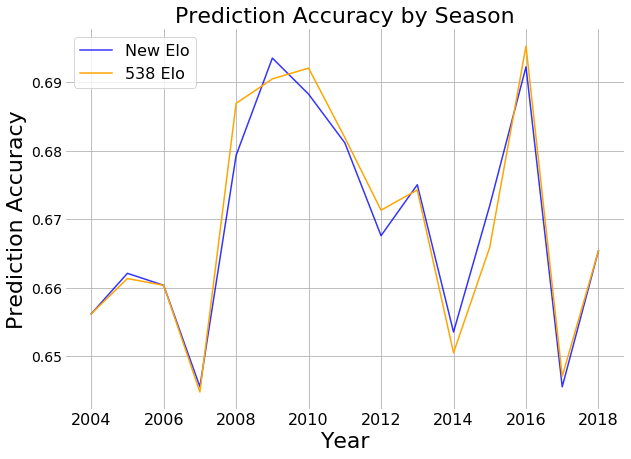

In [35]:
fig, ax = plt.subplots(1,1,figsize=(10,7))

# Plot Accuracies by Year
ax.plot(elo_accs, label = 'New Elo', color='blue', alpha=.8)
ax.plot(elo_538_accs, label = '538 Elo', color='orange')

ax.set_xlabel('Year', fontsize=22)
ax.set_ylabel('Prediction Accuracy', fontsize = 22)
ax.set_title('Prediction Accuracy by Season', fontsize=22)

ax.set_xticklabels([str(i) for i in range(2002, 2019, 2)], fontsize=16)
ax.set_yticklabels([0.0,.65, .66, .67, .68, .69], fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)

ax.legend(fontsize=16)
ax.grid()

#plt.savefig('Elo_accuracy_by_year.png')
plt.show()

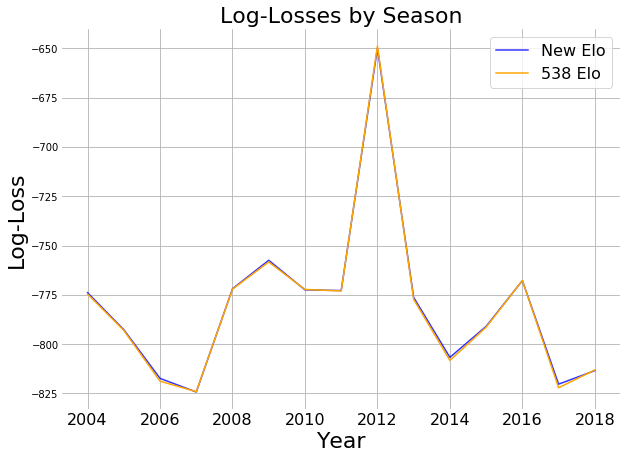

In [36]:
# Plot Losses by Year

fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.plot(elo_losses, label = 'New Elo', color='blue', alpha=.8)
ax.plot(elo_538_losses, label = '538 Elo', color='orange')

ax.set_xlabel('Year', fontsize=22)
ax.set_ylabel('Log-Loss', fontsize = 22)
ax.set_title('Log-Losses by Season', fontsize=22)

ax.set_xticklabels([str(i) for i in range(2002, 2019, 2)], fontsize=16)
#ax.set_yticklabels([0.0,.65, .66, .67, .68, .69], fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)

ax.legend(fontsize=16)
ax.grid()

#plt.savefig('Elo_accuracy_by_year.png')
plt.show()

In [33]:
elo_losses

-813.41022031294006

In [37]:
for i in range(len(elo_losses)):
    if elo_losses[i] > elo_538_losses[i]:
        print('Better!')
    elif elo_losses[i] == elo_538_losses[i]:
        print('Same')
    else:
        print('Worse')

Better!
Better!
Better!
Worse
Better!
Better!
Worse
Better!
Worse
Better!
Better!
Better!
Worse
Better!
Worse


In [197]:
# How Many Games Were Played in the 2015 and 2016 Seasons?
data_1516 = data[data['season']>=2015]
data_1516 = data_1516[data_1516['season']<2017]

data_1516.shape[0]

2627

In [4]:
import numpy as np
mov = 2
np.log(4.5 if mov > 0 else -2.5)

1.5040773967762742